# Prepare Data

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 # Load and Combine the CSV Files

In [299]:
import pandas as pd
import glob

csv_files = ['/content/drive/MyDrive/Student data/ResearchInformation3.csv', '/content/drive/MyDrive/Student data/StudentsPerformance.csv' , '/content/drive/MyDrive/Student data/Students_Performance_data_set.csv' , '/content/drive/MyDrive/Student data/datasets.csv' ]

if isinstance(csv_files, str):
    df = pd.read_csv(csv_files)
else:
    df_list = [pd.read_csv(file) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)

# Display the combined DataFrame
print(df.head())

                Department  Gender   HSC   SSC                        Income  \
0  Business Administration    Male  4.17  4.84            Low (Below 15,000)   
1  Business Administration  Female  4.92  5.00  Upper middle (30,000-50,000)   
2  Business Administration    Male  5.00  4.83  Lower middle (15,000-30,000)   
3  Business Administration    Male  4.00  4.50           High (Above 50,000)   
4  Business Administration  Female  2.19  3.17  Lower middle (15,000-30,000)   

  Hometown  Computer        Preparation             Gaming Attendance  ...  \
0  Village       3.0  More than 3 Hours           0-1 Hour   80%-100%  ...   
1     City       3.0           0-1 Hour           0-1 Hour   80%-100%  ...   
2  Village       3.0           0-1 Hour  More than 3 Hours   80%-100%  ...   
3     City       5.0  More than 3 Hours  More than 3 Hours   80%-100%  ...   
4  Village       3.0           0-1 Hour          2-3 Hours   80%-100%  ...   

  Topic  Relation raisedhands VisITedResources  An

 Calculate Attendance % and Categorize Students

In [300]:
import pandas as pd

# Load the dataset
df.columns = df.columns.str.strip().str.title()


if 'Average Daily Study Time' in df.columns:
    df['Average Daily Study Time'] = df['Average Daily Study Time'].fillna(df['Average Daily Study Time'].mean())

if 'Study Method' in df.columns and 'Learning Preferences' in df.columns:
    df.dropna(subset=['Study Method', 'Learning Preferences'], inplace=True)

# Standardize categorical columns
if 'Study Method' in df.columns:
    df['Study Method'] = df['Study Method'].str.lower().str.strip()
if 'Learning Preferences' in df.columns:
    df['Learning Preferences'] = df['Learning Preferences'].str.title().str.strip()
if 'Challenges Faced' in df.columns:
    df['Challenges Faced'] = df['Challenges Faced'].str.lower().str.strip()

# Validate and clean numeric columns
if 'Stress Levels' in df.columns:
    df['Stress Levels'] = pd.to_numeric(df['Stress Levels'], errors='coerce')
    df = df[(df['Stress Levels'] >= 1) & (df['Stress Levels'] <= 10) | df['Stress Levels'].isna()]


if 'Screen Time - Educational' in df.columns and 'Screen Time - Leisure' in df.columns:
    df[['Screen Time - Educational', 'Screen Time - Leisure']] = df[['Screen Time - Educational', 'Screen Time - Leisure']].apply(pd.to_numeric, errors='coerce')

# Inspecting summary statistics and distributions
print(df.info())
print(df.describe())

if 'Study Method' in df.columns:
    print("📊 Study Method Breakdown:\n", df['Study Method'].value_counts())
if 'Learning Preferences' in df.columns:
    print("🎯 Learning Preferences:\n", df['Learning Preferences'].value_counts())
if 'Challenges Faced' in df.columns:
    print("⚠️ Common Challenges:\n", df['Challenges Faced'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 69 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Department                                                                 493 non-null    object 
 1   Gender                                                                     1687 non-null   object 
 2   Hsc                                                                        493 non-null    float64
 3   Ssc                                                                        493 non-null    float64
 4   Income                                                                     493 non-null    object 
 5   Hometown                                                                   493 non-null    object 
 6   Computer                                                

#attended

In [301]:
import pandas as pd

df.columns = df.columns.str.strip().str.title()

print("DataFrame 'df' is available. Need to identify columns for attendance calculation.")

DataFrame 'df' is available. Need to identify columns for attendance calculation.


In [302]:
[c for c in df.columns if 'attend' in c.lower() or 'class' in c.lower() or 'session' in c.lower()]


['Attendance',
 'Average Attendance On Class',
 'Do You Attend In Teacher Consultancy For Any Kind Of Academical Problems?',
 'Class']

In [303]:
print(df.columns)


Index(['Department', 'Gender', 'Hsc', 'Ssc', 'Income', 'Hometown', 'Computer',
       'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra',
       'Semester', 'Last', 'Overall', 'Gender', 'Race/Ethnicity',
       'Parental Level Of Education', 'Lunch', 'Test Preparation Course',
       'Math Score', 'Reading Score', 'Writing Score',
       'University Admission Year', 'Age', 'H.S.C Passing Year', 'Program',
       'Current Semester', 'Do You Have Meritorious Scholarship ?',
       'Do You Use University Transportation?',
       'How Many Hour Do You Study Daily?',
       'How Many Times Do You Seat For Study In A Day?',
       'What Is Your Preferable Learning Mode?', 'Do You Use Smart Phone?',
       'Do You Have Personal Computer?',
       'How Many Hour Do You Spent Daily In Social Media?',
       'Status Of Your English Language Proficiency',
       'Average Attendance On Class', 'Did You Ever Fall In Probation?',
       'Did You Ever Got Suspension?',
       'Do You At

In [304]:
# Convert Attendance to numeric
df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')

# Now calculate percentage and category
df['Attendance %'] = (df['Attendance'] / 9) * 100

def categorize_attendance(percent):
    if percent >= 90:
        return 'Excellent'
    elif percent >= 75:
        return 'Good'
    elif percent >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Attendance Category'] = df['Attendance %'].apply(categorize_attendance)

# Preview result
print(df[['Attendance', 'Attendance %', 'Attendance Category']].head())


   Attendance  Attendance % Attendance Category
0         NaN           NaN                Poor
1         NaN           NaN                Poor
2         NaN           NaN                Poor
3         NaN           NaN                Poor
4         NaN           NaN                Poor


In [305]:
import pandas as pd

# Assuming 'Attendance' column has values like number of classes attended (e.g., 7 out of 9)
df['Attendance %'] = (df['Attendance'] / 9) * 100

# Categorize Attendance
def categorize_attendance(percent):
    if percent >= 90:
        return 'Excellent'
    elif percent >= 75:
        return 'Good'
    elif percent >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Attendance Category'] = df['Attendance %'].apply(categorize_attendance)

# Quick preview
print(df[['Attendance', 'Attendance %', 'Attendance Category']].head())


   Attendance  Attendance % Attendance Category
0         NaN           NaN                Poor
1         NaN           NaN                Poor
2         NaN           NaN                Poor
3         NaN           NaN                Poor
4         NaN           NaN                Poor


#Display the Data Table

In [306]:

df.columns = df.columns.str.strip().str.title()
print(df.head())

                Department  Gender   Hsc   Ssc                        Income  \
0  Business Administration    Male  4.17  4.84            Low (Below 15,000)   
1  Business Administration  Female  4.92  5.00  Upper middle (30,000-50,000)   
2  Business Administration    Male  5.00  4.83  Lower middle (15,000-30,000)   
3  Business Administration    Male  4.00  4.50           High (Above 50,000)   
4  Business Administration  Female  2.19  3.17  Lower middle (15,000-30,000)   

  Hometown  Computer        Preparation             Gaming  Attendance  ...  \
0  Village       3.0  More than 3 Hours           0-1 Hour         NaN  ...   
1     City       3.0           0-1 Hour           0-1 Hour         NaN  ...   
2  Village       3.0           0-1 Hour  More than 3 Hours         NaN  ...   
3     City       5.0  More than 3 Hours  More than 3 Hours         NaN  ...   
4  Village       3.0           0-1 Hour          2-3 Hours         NaN  ...   

  Raisedhands  Visitedresources Announcement

In [307]:
df.rename(columns={
    'Student Name': 'Name',
    'Student ID': 'ID'
}, inplace=True)


In [308]:
print(df.columns.tolist())


['Department', 'Gender', 'Hsc', 'Ssc', 'Income', 'Hometown', 'Computer', 'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra', 'Semester', 'Last', 'Overall', 'Gender', 'Race/Ethnicity', 'Parental Level Of Education', 'Lunch', 'Test Preparation Course', 'Math Score', 'Reading Score', 'Writing Score', 'University Admission Year', 'Age', 'H.S.C Passing Year', 'Program', 'Current Semester', 'Do You Have Meritorious Scholarship ?', 'Do You Use University Transportation?', 'How Many Hour Do You Study Daily?', 'How Many Times Do You Seat For Study In A Day?', 'What Is Your Preferable Learning Mode?', 'Do You Use Smart Phone?', 'Do You Have Personal Computer?', 'How Many Hour Do You Spent Daily In Social Media?', 'Status Of Your English Language Proficiency', 'Average Attendance On Class', 'Did You Ever Fall In Probation?', 'Did You Ever Got Suspension?', 'Do You Attend In Teacher Consultancy For Any Kind Of Academical Problems?', 'What Are The Skills Do You Have ?', 'How Many Hour

In [309]:
print(df.columns.tolist())


['Department', 'Gender', 'Hsc', 'Ssc', 'Income', 'Hometown', 'Computer', 'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra', 'Semester', 'Last', 'Overall', 'Gender', 'Race/Ethnicity', 'Parental Level Of Education', 'Lunch', 'Test Preparation Course', 'Math Score', 'Reading Score', 'Writing Score', 'University Admission Year', 'Age', 'H.S.C Passing Year', 'Program', 'Current Semester', 'Do You Have Meritorious Scholarship ?', 'Do You Use University Transportation?', 'How Many Hour Do You Study Daily?', 'How Many Times Do You Seat For Study In A Day?', 'What Is Your Preferable Learning Mode?', 'Do You Use Smart Phone?', 'Do You Have Personal Computer?', 'How Many Hour Do You Spent Daily In Social Media?', 'Status Of Your English Language Proficiency', 'Average Attendance On Class', 'Did You Ever Fall In Probation?', 'Did You Ever Got Suspension?', 'Do You Attend In Teacher Consultancy For Any Kind Of Academical Problems?', 'What Are The Skills Do You Have ?', 'How Many Hour

In [310]:
['Full Name', 'ID Number', 'Classes Attended', 'Class Total']


['Full Name', 'ID Number', 'Classes Attended', 'Class Total']

In [311]:
df.rename(columns={
    'Full Name': 'Name',
    'ID Number': 'ID',
    'Classes Attended': 'Attended Classes',
    'Class Total': 'Total Classes'
}, inplace=True)


In [312]:
print(df.columns.tolist())


['Department', 'Gender', 'Hsc', 'Ssc', 'Income', 'Hometown', 'Computer', 'Preparation', 'Gaming', 'Attendance', 'Job', 'English', 'Extra', 'Semester', 'Last', 'Overall', 'Gender', 'Race/Ethnicity', 'Parental Level Of Education', 'Lunch', 'Test Preparation Course', 'Math Score', 'Reading Score', 'Writing Score', 'University Admission Year', 'Age', 'H.S.C Passing Year', 'Program', 'Current Semester', 'Do You Have Meritorious Scholarship ?', 'Do You Use University Transportation?', 'How Many Hour Do You Study Daily?', 'How Many Times Do You Seat For Study In A Day?', 'What Is Your Preferable Learning Mode?', 'Do You Use Smart Phone?', 'Do You Have Personal Computer?', 'How Many Hour Do You Spent Daily In Social Media?', 'Status Of Your English Language Proficiency', 'Average Attendance On Class', 'Did You Ever Fall In Probation?', 'Did You Ever Got Suspension?', 'Do You Attend In Teacher Consultancy For Any Kind Of Academical Problems?', 'What Are The Skills Do You Have ?', 'How Many Hour

In [313]:
!pip install pyngrok
from pyngrok import ngrok
import threading

# Open a tunnel for Dash app
def run_dash():
    app.run_server(port=8050)

threading.Thread(target=run_dash).start()


Exception in thread Thread-6862 (run_dash):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipython-input-2114413977.py", line 7, in run_dash


In [314]:
!pip install dash

  File "/usr/local/lib/python3.11/dist-packages/dash/_obsolete.py", line 22, in __getattr__
    raise err.exc(err.message)
dash.exceptions.ObsoleteAttributeException: app.run_server has been replaced by app.run


In [315]:
import dash
from dash import html, dash_table
import pandas as pd

# Sample DataFrame (use your cleaned version here)
df = pd.DataFrame({
    'Student Name': ['Amit', 'Riya', 'Zoya', 'Kunal'],
    'Student ID': [101, 102, 103, 104],
    'Total Classes': [9, 9, 9, 9],
    'Attended Classes': [8, 6, 9, 5]
})

# Calculate attendance percentage and category
df['Attendance %'] = (df['Attended Classes'] / df['Total Classes']) * 100

def categorize_attendance(percent):
    if percent >= 90:
        return 'Excellent'
    elif percent >= 75:
        return 'Good'
    elif percent >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Attendance Category'] = df['Attendance %'].apply(categorize_attendance)

# Initialize Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H2("📋 Student Attendance Table"),
    dash_table.DataTable(
        columns=[{"name": col, "id": col} for col in df.columns],
        data=df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'center', 'padding': '8px'},
        style_header={
            'backgroundColor': '#f0f0f0',
            'fontWeight': 'bold'
        },
        style_data_conditional=[
            {
                'if': {
                    'filter_query': '{Attendance Category} = "Poor"',
                    'column_id': 'Attendance Category'
                },
                'backgroundColor': '#ffe6e6',
                'color': 'red'
            },
            {
                'if': {
                    'filter_query': '{Attendance Category} = "Excellent"',
                    'column_id': 'Attendance Category'
                },
                'backgroundColor': '#e6ffe6',
                'color': 'green'
            },
        ]
    )
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [316]:
from pyngrok import ngrok
import os


ngrok.set_auth_token("YOUR_AUTHTOKEN")

print("Ngrok authtoken set.")

Ngrok authtoken set.


In [317]:
import dash
from dash import html, dash_table
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({
    'Student Name': ['Amit', 'Riya', 'Zoya', 'Kunal'],
    'Student ID': [101, 102, 103, 104],
    'Avg Study Time (hrs/day)': [3.5, 2, 4, 1.5],
    'Study Method': ['Group', 'Self', 'Online', 'Group'],
    'Screen Time (Edu/Leisure)': ['2 / 1.5', '1 / 2.5', '2.5 / 1', '1 / 3'],
    'Stress Level (1–10)': [6, 7, 4, 8],
    'Learning Preference': ['Visual', 'Reading/Writing', 'Kinesthetic', 'Auditory'],
    'Challenges Faced': ['Time management', 'Lack of resources', 'Procrastination', 'Multiple'],
    'Attended Classes': [8, 6, 9, 5],
    'Total Classes': [9, 9, 9, 9]
})

# Calculate attendance percentage and category
df['Attendance %'] = (df['Attended Classes'] / df['Total Classes']) * 100

def categorize_attendance(p):
    if p >= 90:
        return 'Excellent'
    elif p >= 75:
        return 'Good'
    elif p >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Category'] = df['Attendance %'].apply(categorize_attendance)

# Initialize Dash app
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H3("📋 Student Survey Dashboard"),
    dash_table.DataTable(
        columns=[{"name": col, "id": col} for col in df.columns],
        data=df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'center', 'padding': '5px'},
        style_header={'backgroundColor': '#e0e0e0', 'fontWeight': 'bold'},
        style_data_conditional=[
            {
                'if': {'filter_query': '{Category} = "Excellent"', 'column_id': 'Category'},
                'backgroundColor': '#e6ffe6',
                'color': 'green'
            },
            {
                'if': {'filter_query': '{Category} = "Poor"', 'column_id': 'Category'},
                'backgroundColor': '#ffe6e6',
                'color': 'red'
            }
        ]
    )
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

# Create Visualizations

. Attendance vs. Study Time

In [318]:
print(df.columns.tolist())


['Student Name', 'Student ID', 'Avg Study Time (hrs/day)', 'Study Method', 'Screen Time (Edu/Leisure)', 'Stress Level (1–10)', 'Learning Preference', 'Challenges Faced', 'Attended Classes', 'Total Classes', 'Attendance %', 'Category']


**Screen Time (Leisure) vs. Stress**

In [319]:
# Split screen time into two columns
df[['Edu Screen Time', 'Leisure Screen Time']] = df['Screen Time (Edu/Leisure)'].str.split('/', expand=True)

# Convert to numeric
df['Edu Screen Time'] = pd.to_numeric(df['Edu Screen Time'], errors='coerce')
df['Leisure Screen Time'] = pd.to_numeric(df['Leisure Screen Time'], errors='coerce')


/tmp/ipython-input-665741229.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-665741229.py:27: UserWarning:

Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.



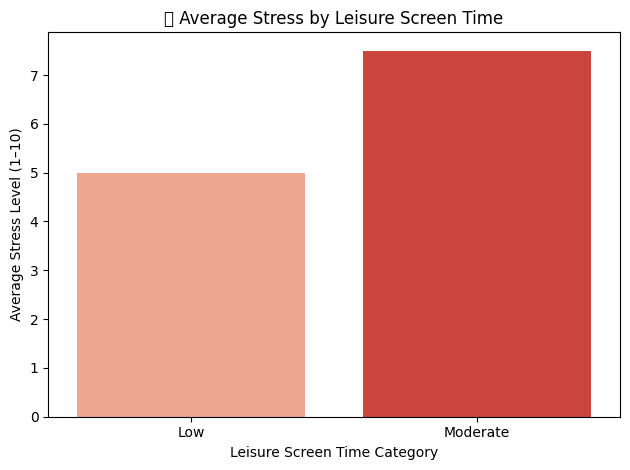

In [320]:
# Categorize leisure screen time
def categorize_leisure_time(hours):
    if pd.isna(hours):
        return 'Unknown'
    elif hours > 3:
        return 'High'
    elif hours > 1.5:
        return 'Moderate'
    else:
        return 'Low'

df['Leisure Time Category'] = df['Leisure Screen Time'].apply(categorize_leisure_time)

# Fix stress column name
df['Stress Level (1–10)'] = pd.to_numeric(df['Stress Level (1–10)'], errors='coerce')

# Plot average stress by leisure screen time category
stress_screen = df.groupby('Leisure Time Category')['Stress Level (1–10)'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=stress_screen, x='Leisure Time Category', y='Stress Level (1–10)', palette='Reds')
plt.title('📱 Average Stress by Leisure Screen Time')
plt.ylabel('Average Stress Level (1–10)')
plt.xlabel('Leisure Screen Time Category')
plt.tight_layout()
plt.show()


#PIE chart

Learning Preference Distribution

/tmp/ipython-input-2699953283.py:17: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.



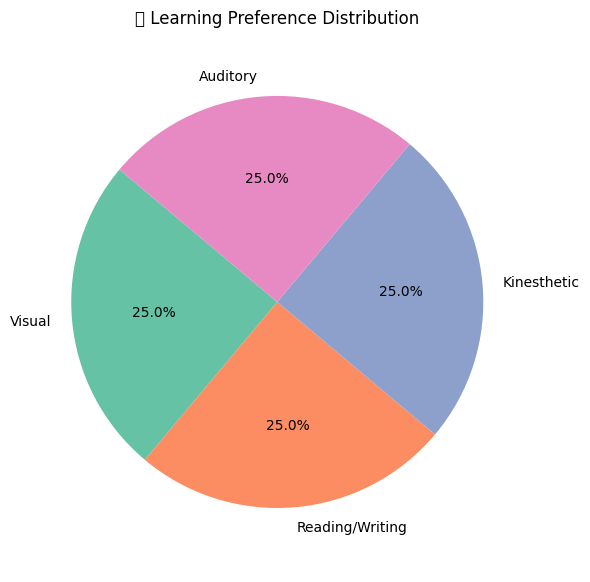

In [321]:
import pandas as pd
import matplotlib.pyplot as plt

# Standardize column names (if needed)
df.columns = df.columns.str.strip().str.title()

# Clean and count learning preference data
df['Learning Preference'] = df['Learning Preference'].str.title().str.strip()
preference_counts = df['Learning Preference'].value_counts()

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
plt.pie(preference_counts, labels=preference_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('🎯 Learning Preference Distribution')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


#Challenges Breakdown: Most common difficulties reported.

In [322]:
# Standardize the column name and content
df.columns = df.columns.str.strip().str.title()
df['Challenges Faced'] = df['Challenges Faced'].str.lower().str.strip()

# Count frequency of each challenge type
challenges_count = df['Challenges Faced'].value_counts()

# Display
print("📊 Most Common Student Challenges:")
print(challenges_count)


📊 Most Common Student Challenges:
Challenges Faced
time management      1
lack of resources    1
procrastination      1
multiple             1
Name: count, dtype: int64


/tmp/ipython-input-2355600971.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




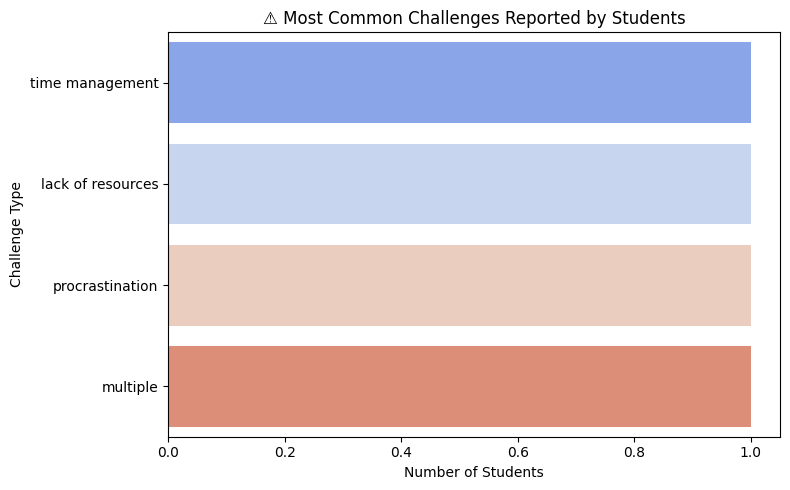

In [323]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=challenges_count.values, y=challenges_count.index, palette='coolwarm')
plt.title('⚠️ Most Common Challenges Reported by Students')
plt.xlabel('Number of Students')
plt.ylabel('Challenge Type')
plt.tight_layout()
plt.show()


In [324]:
import plotly.express as px

# Ensure student names and attendance % exist
fig_bar = px.bar(
    df,
    x='Student Name',
    y='Attendance %',
    color='Category',
    title='📊 Attendance Percentage by Student',
    text='Attendance %',
    labels={'Attendance %': 'Attendance Percentage'},
    height=400
)

fig_bar.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig_bar.update_layout(yaxis=dict(title='Attendance %'), xaxis=dict(title='Student Name'))
fig_bar.show()


In [325]:
fig_pie = px.pie(
    df,
    names='Category',
    title='🥧 Attendance Category Distribution',
    hole=0.4,
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show()


**Full Dashboard Code Using Dash**

In [326]:
import dash
from dash import html, dash_table
import plotly.express as px
import pandas as pd

# Sample DataFrame (replace with your cleaned data)
df = pd.DataFrame({
    'Student Name': ['Amit', 'Riya', 'Zoya', 'Kunal'],
    'Student ID': [101, 102, 103, 104],
    'Total Classes': [9, 9, 9, 9],
    'Attended Classes': [8, 6, 9, 5]
})

# Compute attendance %
df['Attendance %'] = (df['Attended Classes'] / df['Total Classes']) * 100

# Categorize attendance
def categorize_attendance(p):
    if p >= 90:
        return 'Excellent'
    elif p >= 75:
        return 'Good'
    elif p >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Category'] = df['Attendance %'].apply(categorize_attendance)

# 📊 Bar Chart: Attendance % per student
fig_bar = px.bar(
    df, x='Student Name', y='Attendance %', color='Category',
    title='📊 Attendance % by Student', text='Attendance %',
    labels={'Attendance %': 'Attendance Percentage'},
    height=350
)
fig_bar.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# 🥧 Pie Chart: Category Distribution
fig_pie = px.pie(
    df, names='Category', title='🥧 Attendance Category Distribution',
    hole=0.4, color_discrete_sequence=px.colors.qualitative.Set3
)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')

# 🚀 Build Dash App
app = dash.Dash(__name__)
app.title = "Student Attendance Dashboard"

app.layout = html.Div([
    html.H2("📘 Student Attendance Dashboard", style={'textAlign': 'center'}),

    html.Div("⚠️ Warning: Poor attendance detected in some students. Please follow up.", style={
        'backgroundColor': '#ffe6e6',
        'padding': '10px',
        'border': '1px solid #ffcccc',
        'color': 'darkred',
        'textAlign': 'center',
        'marginBottom': '20px'
    }),

    html.Div([
        dash_table.DataTable(
            columns=[{"name": col, "id": col} for col in df.columns],
            data=df.to_dict('records'),
            style_table={'overflowX': 'auto', 'width': '45%'},
            style_cell={'textAlign': 'center', 'padding': '8px'},
            style_header={'backgroundColor': '#f0f0f0', 'fontWeight': 'bold'},
            style_data_conditional=[
                {
                    'if': {'filter_query': '{Category} = "Poor"', 'column_id': 'Category'},
                    'backgroundColor': '#ffe6e6',
                    'color': 'red'
                },
                {
                    'if': {'filter_query': '{Category} = "Excellent"', 'column_id': 'Category'},
                    'backgroundColor': '#e6ffe6',
                    'color': 'green'
                }
            ]
        ),

        html.Div([
            html.Div([
                html.H4("📊 Attendance % by Student"),
                html.Div(children=[fig_bar.to_html(include_plotlyjs='cdn', full_html=False)], style={'marginBottom': '30px'})
            ]),
            html.Div([
                html.H4("🥧 Category Distribution"),
                html.Div(children=[fig_pie.to_html(include_plotlyjs='cdn', full_html=False)])
            ])
        ], style={'width': '50%', 'paddingLeft': '20px'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'})
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [327]:
import dash
from dash import html, dcc, dash_table
import plotly.express as px
import pandas as pd

# 🧮 Sample Data (replace with actual data)
df = pd.DataFrame({
    'Student Name': ['Amit', 'Riya', 'Zoya', 'Kunal'],
    'Student ID': [101, 102, 103, 104],
    'Total Classes': [9, 9, 9, 9],
    'Attended Classes': [8, 6, 9, 5]
})

# 🎯 Attendance Calculations
df['Attendance %'] = (df['Attended Classes'] / df['Total Classes']) * 100

def categorize(p):
    if p >= 90:
        return 'Excellent'
    elif p >= 75:
        return 'Good'
    elif p >= 60:
        return 'Average'
    else:
        return 'Poor'

df['Category'] = df['Attendance %'].apply(categorize)

# 📊 Charts
bar_fig = px.bar(df, x='Student Name', y='Attendance %', color='Category',
                 text='Attendance %', title='📊 Attendance % by Student',
                 color_discrete_sequence=px.colors.qualitative.Set1)

bar_fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
bar_fig.update_layout(yaxis_title='Attendance %', xaxis_title='Student')

pie_fig = px.pie(df, names='Category', title='🥧 Attendance Category Distribution',
                 color_discrete_sequence=px.colors.qualitative.Set3, hole=0.4)
pie_fig.update_traces(textinfo='percent+label', textposition='inside')

# 🚀 Dash App
app = dash.Dash(__name__)
app.title = "Attendance Dashboard"

app.layout = html.Div([
    html.H2("📘 Student Attendance Dashboard", style={'textAlign': 'center'}),

    html.Div("⚠️ Warning: Some students have poor attendance. Please review and take necessary action.", style={
        'backgroundColor': '#fff0f0',
        'padding': '12px',
        'textAlign': 'center',
        'color': '#a94442',
        'marginBottom': '20px',
        'border': '1px solid #f2dede',
        'borderRadius': '5px'
    }),

    html.Div([
        dash_table.DataTable(
            id='attendance-table',
            columns=[{"name": i, "id": i} for i in df.columns],
            data=df.to_dict('records'),
            style_table={'width': '45%', 'overflowX': 'auto'},
            style_cell={'textAlign': 'center'},
            style_header={'backgroundColor': '#f8f8f8', 'fontWeight': 'bold'},
            style_data_conditional=[
                {
                    'if': {'filter_query': '{Category} = "Poor"', 'column_id': 'Category'},
                    'backgroundColor': '#fde0dc',
                    'color': 'red'
                },
                {
                    'if': {'filter_query': '{Category} = "Excellent"', 'column_id': 'Category'},
                    'backgroundColor': '#e0f7fa',
                    'color': 'green'
                }
            ]
        ),

        html.Div([
            dcc.Graph(figure=bar_fig),
            dcc.Graph(figure=pie_fig)
        ], style={'width': '50%', 'display': 'inline-block', 'verticalAlign': 'top'})
    ], style={'display': 'flex'}) # Completed the layout definition with closing brackets and parentheses
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [328]:
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc, dash_table

# Use the already-loaded DataFrame (df)
# Clean column names
df.columns = df.columns.str.strip()

# Set the correct column names
att_pct_col = 'Attendance %'  # <- from your original data

# Ensure it's numeric
df[att_pct_col] = pd.to_numeric(df[att_pct_col], errors='coerce')

# Categorize attendance
def categorize(att_pct):
    if pd.isna(att_pct):
        return 'Unknown'
    elif att_pct >= 90:
        return 'Good'
    elif att_pct >= 75:
        return 'Warning'
    else:
        return 'Critical'

df['Category'] = df[att_pct_col].apply(categorize)

# Top warning message
critical_students = df[df['Category'] == 'Critical']
critical_warning_text = (
    f"⚠️ {len(critical_students)} student(s) with Critical attendance!"
    if not critical_students.empty else "✅ No critical attendance issues!"
)

# Bar Chart
bar_fig = px.bar(
    df, x='Student Name', y=att_pct_col, color='Category',
    title='Attendance Percentage per Student', text=att_pct_col
)
bar_fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
bar_fig.update_layout(yaxis=dict(range=[0, 100]))

# Pie Chart
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
pie_fig = px.pie(
    category_counts, names='Category', values='Count',
    title='Attendance Category Distribution',
    color_discrete_sequence=px.colors.qualitative.Set2,
    hole=0.3
)
pie_fig.update_traces(textinfo='percent+label')

# Dash App
app = Dash(__name__)

app.layout = html.Div([
    html.H1("📅 Student Attendance Dashboard", style={'textAlign': 'center'}),

    html.H3(critical_warning_text, style={'textAlign': 'center', 'color': 'crimson'}),

    html.H2("📋 Attendance Table"),
    dash_table.DataTable(
        columns=[{"name": col, "id": col} for col in df.columns],
        data=df.to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'center'},
        style_header={'backgroundColor': 'lightblue', 'fontWeight': 'bold'}
    ),

    html.Div([
        html.Div([
            dcc.Graph(figure=bar_fig)
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            dcc.Graph(figure=pie_fig)
        ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'})
    ])
])

# Run App
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [329]:
print("🧾 Columns in DataFrame:", df.columns.tolist())


🧾 Columns in DataFrame: ['Student Name', 'Student ID', 'Total Classes', 'Attended Classes', 'Attendance %', 'Category']


In [330]:
df[attended_col] = pd.to_numeric(df[attended_col], errors='coerce')
df[total_col] = pd.to_numeric(df[total_col], errors='coerce')


In [331]:
print(df[[attended_col, total_col]].isna().sum())


Attended Classes    0
Total Classes       0
dtype: int64


In [332]:
from dash.dependencies import Input, Output
from dash import dcc

# Dropdown for filtering by category
html.Div([
    html.Label("Filter by Attendance Category"),
    dcc.Dropdown(
        id='category-filter',
        options=[{'label': cat, 'value': cat} for cat in df['Category'].unique()],
        value=None,
        placeholder="Select a category"
    )
])

Div([Label('Filter by Attendance Category'), Dropdown(options=[{'label': 'Warning', 'value': 'Warning'}, {'label': 'Critical', 'value': 'Critical'}, {'label': 'Good', 'value': 'Good'}], placeholder='Select a category', id='category-filter')])

In [333]:
dcc.Download(id='download-dataframe-csv'),
html.Button("Download CSV", id="btn-download"),


(Button(children='Download CSV', id='btn-download'),)

In [334]:
dcc.Upload(
    id='upload-data',
    children=html.Div(["📂 Drag and drop or select a CSV file"]),
    multiple=False
)


Upload(children=Div(['📂 Drag and drop or select a CSV file']), id='upload-data', multiple=False)

In [335]:
import pandas as pd

# Sample data – replace with your actual survey data
data = pd.DataFrame({
    "Challenge": ["Distractions", "Time Management", "Lack of Resources", "Anxiety", "Procrastination"],
    "Frequency": [45, 38, 30, 27, 20]
})


#Dash Layout & Horizontal Bar Chart

In [336]:
import dash
from dash import html, dcc
import plotly.express as px

app = dash.Dash(__name__)

# Horizontal Bar Chart
fig = px.bar(
    data,
    x="Frequency",
    y="Challenge",
    orientation="h",
    title="Most Common Student Challenges",
    text="Frequency",
    color="Challenge"
)
fig.update_layout(yaxis={'categoryorder':'total ascending'}, showlegend=False)
fig.update_traces(textposition="outside")

# Layout
app.layout = html.Div([
    html.H2("📊 Most Common Challenges"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

#Stacked Bar Chart to Show Distribution

In [337]:
import pandas as pd

# Sample data for demo
data = pd.DataFrame({
    "Study_Method": ["Visual", "Auditory", "Kinesthetic", "Visual", "Mixed", "Auditory", "Kinesthetic", "Mixed"],
    "Challenge": ["Distractions", "Time Management", "Lack of Resources", "Anxiety", "Distractions", "Procrastination", "Time Management", "Anxiety"],
    "Count": [12, 15, 10, 8, 14, 9, 11, 7]
})


In [338]:
import dash
from dash import html, dcc
import plotly.express as px

app = dash.Dash(__name__)

# Stacked Bar Chart
fig = px.bar(
    data,
    x="Study_Method",
    y="Count",
    color="Challenge",
    title="Challenge Distribution Across Study Methods",
    text="Count"
)
fig.update_layout(barmode="stack", xaxis_title="Study Method", yaxis_title="Student Count")
fig.update_traces(textposition="inside")

# Layout
app.layout = html.Div([
    html.H2("🧠 Challenge vs Study Preference"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

#Attendance % by Challenge Type

In [339]:
import pandas as pd

data = pd.DataFrame({
    "Challenge": ["Distractions", "Time Management", "Lack of Resources", "Anxiety", "Procrastination"],
    "Avg_Attendance_Percent": [82.5, 76.3, 68.4, 70.2, 85.0],
    "Student_Count": [45, 38, 30, 27, 20]
})


In [340]:
import dash
from dash import html, dcc
import plotly.express as px

app = dash.Dash(__name__)

# Bar Chart: Attendance by Challenge
fig = px.bar(
    data,
    x="Challenge",
    y="Avg_Attendance_Percent",
    text="Avg_Attendance_Percent",
    title="📈 Attendance % for Students Reporting Each Challenge",
    color="Challenge"
)
fig.update_layout(yaxis_title="Average Attendance (%)", showlegend=False)
fig.update_traces(textposition="outside")

# Layout
app.layout = html.Div([
    html.H2("📈 Attendance Trends"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

#Avg Study Time by Method

In [341]:
study_data = pd.DataFrame({
    "Study_Method": ["Group", "Self", "Online"],
    "Avg_Study_Hours": [2.4, 3.2, 1.8]
})

import plotly.express as px

fig = px.bar(
    study_data,
    x="Study_Method",
    y="Avg_Study_Hours",
    text="Avg_Study_Hours",
    title="📚 Average Study Time by Method",
    color="Study_Method"
)
fig.update_traces(textposition="outside")


In [342]:
import pandas as pd

# Sample dataset for visualization
data = pd.DataFrame({
    "Student_ID": [101, 102, 103, 104, 105],
    "Daily_Study_Hours": [2.5, 4.0, 1.8, 3.5, 5.2],
    "Stress_Score": [3.2, 4.5, 2.0, 3.8, 4.7]  # On a scale of 1 (low) to 5 (high)
})


In [343]:
import dash
from dash import html, dcc
import plotly.express as px

app = dash.Dash(__name__)

# Scatter Plot
fig = px.scatter(
    data,
    x="Daily_Study_Hours",
    y="Stress_Score",
    hover_name="Student_ID",
    color="Stress_Score",
    color_continuous_scale="RdYlGn_r",
    title="🧪 Study Time vs. Stress Levels"
)
fig.update_layout(xaxis_title="Daily Study Hours", yaxis_title="Stress Score (1–5)")

# Layout
app.layout = html.Div([
    html.H2("🧠 Study Behavior Analysis"),
    dcc.Graph(figure=fig)
])

if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>

In [344]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
from sklearn.linear_model import LinearRegression

# 🧪 Sample dataset — replace with your cleaned survey data
df = pd.DataFrame({
    'financial_stress': [1, 0, 1, 0],
    'family_issues': [0, 1, 1, 0],
    'motivation_score': [5, 8, 3, 7],   # Scale: 1–10
    'attendance_pct': [60, 85, 55, 78],
    'stress_score': [80, 65, 90, 70]
})

# 🎯 Train models
attendance_model = LinearRegression().fit(
    df[['financial_stress', 'family_issues', 'motivation_score']],
    df['attendance_pct']
)
stress_model = LinearRegression().fit(
    df[['financial_stress', 'family_issues', 'motivation_score']],
    df['stress_score']
)

# 🌐 Dash App Layout
app = dash.Dash(__name__)
app.layout = html.Div([
    html.H2("🎯 Predictive Modeling Panel"),

    html.Label("Financial Stress (1 = Yes, 0 = No)"),
    dcc.Input(id='fin_stress', type='number', value=0, min=0, max=1),

    html.Label("Family Issues (1 = Yes, 0 = No)"),
    dcc.Input(id='fam_issues', type='number', value=0, min=0, max=1),

    html.Label("Motivation Score (1–10)"),
    dcc.Input(id='mot_score', type='number', value=5, min=1, max=10),

    html.Br(), html.Br(),
    html.Div(id='output')
])

# 🔁 Callback for Predictions
@app.callback(
    Output('output', 'children'),
    [Input('fin_stress', 'value'),
     Input('fam_issues', 'value'),
     Input('mot_score', 'value')]
)
def predict_outcomes(fin_stress, fam_issues, mot_score):
    features = [[fin_stress, fam_issues, mot_score]]
    pred_attendance = attendance_model.predict(features)[0]
    pred_stress = stress_model.predict(features)[0]

    return html.Div([
        html.H4(f"🕒 Estimated Attendance: {pred_attendance:.2f}%"),
        html.H4(f"🔥 Predicted Stress Score: {pred_stress:.2f}/100")
    ])

# 🚀 Run the App
if __name__ == '__main__':
    app.run(debug=True)

---------------------------------------------------------------------------
DependencyException                       Traceback (most recent call last)
DependencyException: Error loading dependency. "plotly" is not a registered library.
Registered libraries are:
['dash']



<IPython.core.display.Javascript object>

In [345]:
import plotly.express as px
import pandas as pd

# 🧪 Sample data — replace with your survey results
data = pd.DataFrame({
    'Learning Preference': ['Visual', 'Auditory', 'Reading/Writing', 'Kinesthetic'],
    'Count': [120, 85, 60, 35]
})

# 🥧 Create the pie chart
fig = px.pie(
    data,
    names='Learning Preference',
    values='Count',
    title='📚 Learning Preference Distribution',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hole=0.3  # Optional: donut-style
)

fig.update_traces(textinfo='percent+label')
fig.show()
